<a href="https://colab.research.google.com/github/PranayPrasanth/100DaysOfCode-DataScience-Projects/blob/master/Google_Trends_and_Data_Visualisation_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Trends and Real-World Data Analysis

# Introduction and Objective

This notebook explores the relationship between Google Search Trends and various real-world data, including stock prices (Tesla and Bitcoin) and the U.S. unemployment rate. The objective is to investigate whether search popularity, as indicated by Google Trends, can serve as an early indicator or correlate with changes in these economic and financial metrics.

Specifically, we will:
- Load and explore datasets for Tesla stock price and search interest, Bitcoin price and search interest, and U.S. unemployment rate and search interest for unemployment benefits.
- Clean the data by handling missing values and converting data types.
- Resample daily Bitcoin data to a monthly frequency for consistent analysis with other datasets.
- Visualize the relationships between search trends and the corresponding real-world data using time series plots.
- Analyze the plots to identify any apparent correlations or leading indicators.

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Load the datasets from CSV files into pandas DataFrames
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')
df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')
df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [ ]:
# Display the shape (number of rows and columns) of the Tesla DataFrame
df_tesla.shape

(124, 3)

In [ ]:
# Display the first 10 rows of the Tesla DataFrame
df_tesla.head(10)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368
5,2010-11-01,2,7.066
6,2010-12-01,2,5.326
7,2011-01-01,3,4.820
8,2011-02-01,2,4.778
9,2011-03-01,3,5.550


In [ ]:
# Display descriptive statistics for the Tesla DataFrame
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [ ]:
# Find and print the largest and smallest values in the 'TSLA_WEB_SEARCH' column
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()} ')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2 


In [ ]:
# This cell is empty and can be removed or used for future code.

### Unemployment Data

In [ ]:
# Display the shape of the Unemployment DataFrame
df_unemployment.shape

(181, 3)

In [ ]:
# Display the first 10 rows of the Unemployment DataFrame
df_unemployment.head(10)

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6
5,2004-06,29,5.6
6,2004-07,26,5.5
7,2004-08,26,5.4
8,2004-09,23,5.4
9,2004-10,26,5.5


In [ ]:
# Display descriptive statistics for the Unemployment DataFrame
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [ ]:
# Find and print the largest value in the 'UE_BENEFITS_WEB_SEARCH' column
print(f"Largest value for Unemployemnt Benefits: {df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()}")

Largest value for Unemployemnt Benefits: 100


### Bitcoin

In [ ]:
# Display the shape of the Bitcoin price DataFrame
df_btc_price.shape

(2204, 3)

In [ ]:
# Display the first 10 rows of the Bitcoin price DataFrame
df_btc_price.head(10)

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0
5,2014-09-22,402.152008,24127600.0
6,2014-09-23,435.790985,45099500.0
7,2014-09-24,423.204987,30627700.0
8,2014-09-25,411.574005,26814400.0
9,2014-09-26,404.424988,21460800.0


In [ ]:
# Display descriptive statistics for the Bitcoin price DataFrame
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


In [ ]:
# Find and print the largest value in the 'VOLUME' column of the Bitcoin price DataFrame
print(f'largest BTC News Search: {df_btc_price["VOLUME"].max()}')

largest BTC News Search: 74156772074.0


# Data Cleaning

### Check for Missing Values

In [ ]:
# Check for missing values in each DataFrame and print the count
print(f'Missing values for Tesla?: {df_tesla.isna().any().sum()} ')
print(f'Missing values for U/E?: {df_unemployment.isna().any().sum()} ')
print(f'Missing values for BTC Search?: {df_btc_search.isna().any().sum()} ')

Missing values for Tesla?: 0 
Missing values for U/E?: 0 
Missing values for BTC Search?: 0 


In [ ]:
# Check for missing values in the Bitcoin price DataFrame and print the count
print(f'Missing values for BTC price?: {df_btc_price.isna().any().sum()} ')

Missing values for BTC price?: 2 


**Challenge**: Remove any missing values that you found.

In [ ]:
# Remove rows with missing values from the Bitcoin price DataFrame
df_btc_price = df_btc_price.dropna(axis=0)

### Convert Strings to DateTime Objects

In [ ]:
# Convert the 'MONTH' column in the Tesla DataFrame to datetime objects
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])

In [ ]:
# Convert the 'DATE' column in the Bitcoin price DataFrame to datetime objects
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [ ]:
# Convert the 'MONTH' column in the Unemployment DataFrame to datetime objects
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

### Converting from Daily to Monthly Data



In [ ]:
# Resample the daily Bitcoin price data to monthly frequency and calculate the mean
# The 'M' frequency is deprecated, using 'ME' (Month End) is recommended for future versions.
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()
df_btc_monthly.head(10)

/tmp/ipython-input-21-311849599.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()


,CLOSE,VOLUME
DATE,,
2014-09-30,407.182428,2.934864e+07
2014-10-31,364.148873,2.912885e+07
2014-11-30,366.099799,2.199111e+07
2014-12-31,341.267871,1.784201e+07
2015-01-31,248.782547,3.544555e+07
2015-02-28,234.153645,2.541138e+07
2015-03-31,269.042259,3.093865e+07
2015-04-30,235.491534,2.241129e+07
2015-05-31,236.997001,1.832654e+07


# Data Visualisation

### Notebook Formatting & Style Helpers

In [ ]:
# Create locator objects for setting the position of ticks on the time axis for years and months
years = mdates.YearLocator()
months = mdates.MonthLocator()
# Create a formatter object to display years as four digits
years_fmt = mdates.DateFormatter('%Y')

In [ ]:
# Register date converters to avoid warning messages when plotting dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

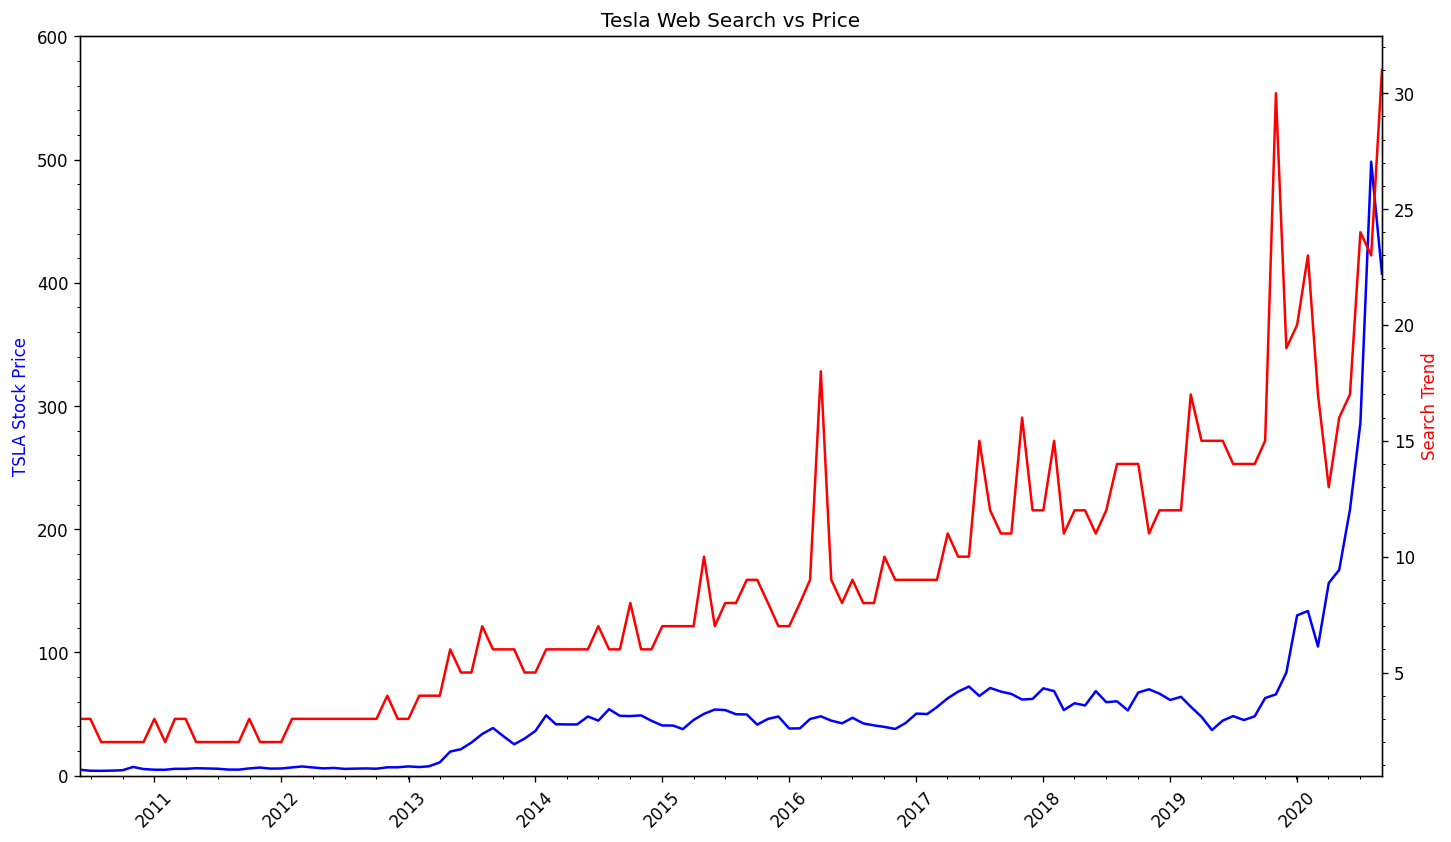

<Figure size 1440x960 with 0 Axes>

In [ ]:
# Create a figure and axes for the plot with a specified size and resolution
plt.figure(figsize=(14,8), dpi=120)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Get the current axes and create a twin axis for the second y-axis
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx()

# Set the labels and colors for the y-axes
ax1.set_ylabel("TSLA Stock Price", color='blue')
ax2.set_ylabel("Search Trend", color='red')

# Plot the Tesla stock price and web search data on their respective axes
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color='blue')
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], color='red')

# Set the title of the plot
plt.title('Tesla Web Search vs Price')

# Create another figure (this seems redundant as the plot is drawn on the first figure)
plt.figure(figsize=(12,8), dpi=120)

# Set the limits for the y and x axes
ax1.set_ylim([0,600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# Add minor ticks to both axes
ax1.minorticks_on()
ax2.minorticks_on()

### Bitcoin (BTC) Price v.s. Search Volume

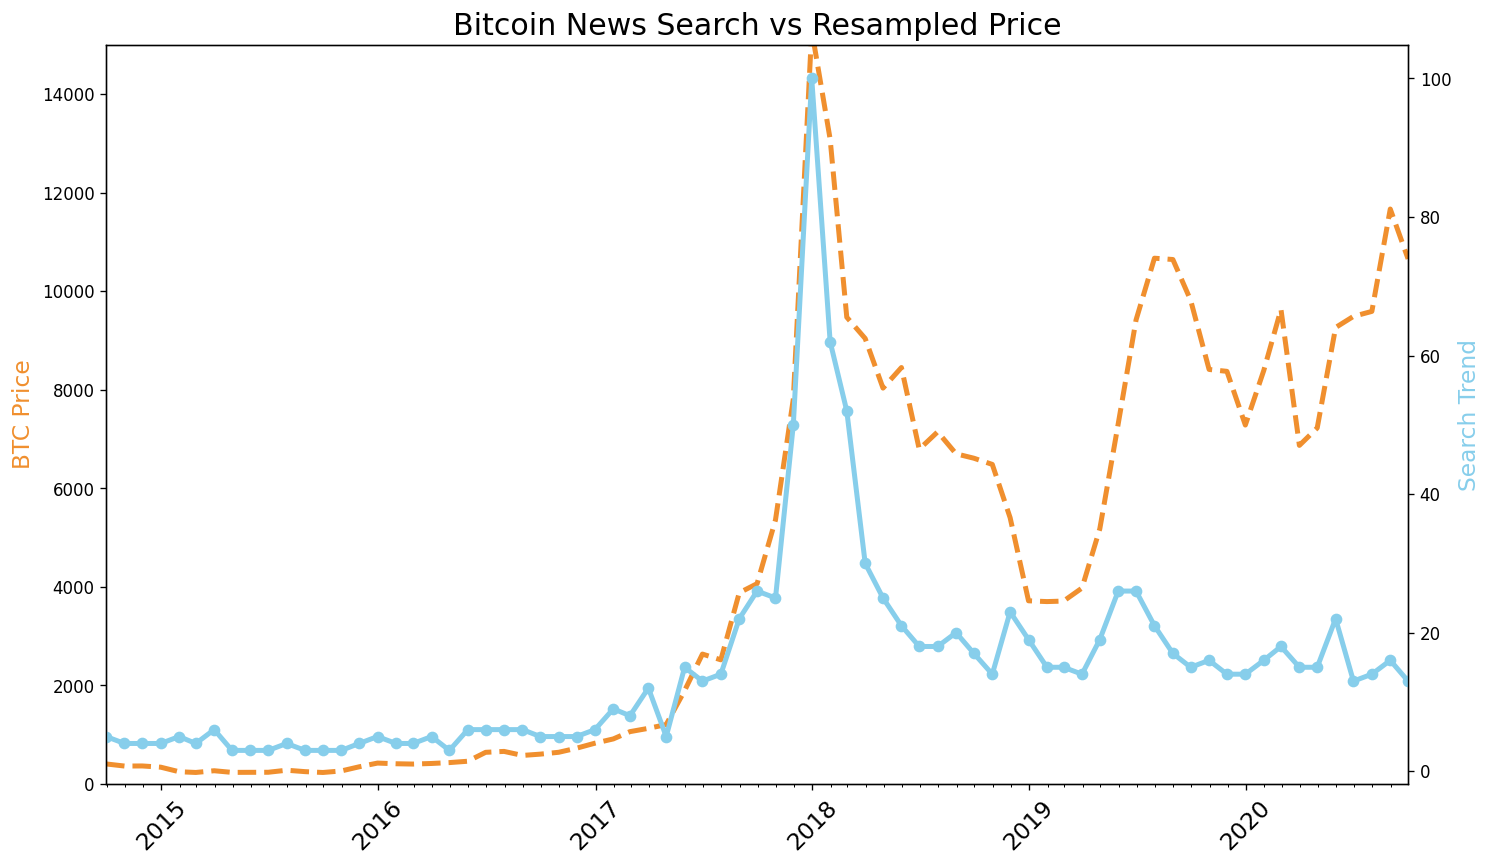

In [ ]:
# Create a figure and axes for the plot with a specified size and resolution
plt.figure(figsize=(14,8), dpi=120)

# Set the title of the plot
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
# Set the font size and rotate the x-axis labels
plt.xticks(fontsize=14, rotation=45)

# Get the current axes and create a twin axis for the second y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# Set the labels and colors for the y-axes
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# Set the major and minor locators and formatters for the x-axis (dates)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set the limits for the y and x axes
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Plot the monthly Bitcoin price and search trend data on their respective axes
# Experimenting with linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE,
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH,
         color='skyblue', linewidth=3, marker='o')

# Display the plot
plt.show()

In [ ]:
# This cell is empty and can be removed or used for future code.

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

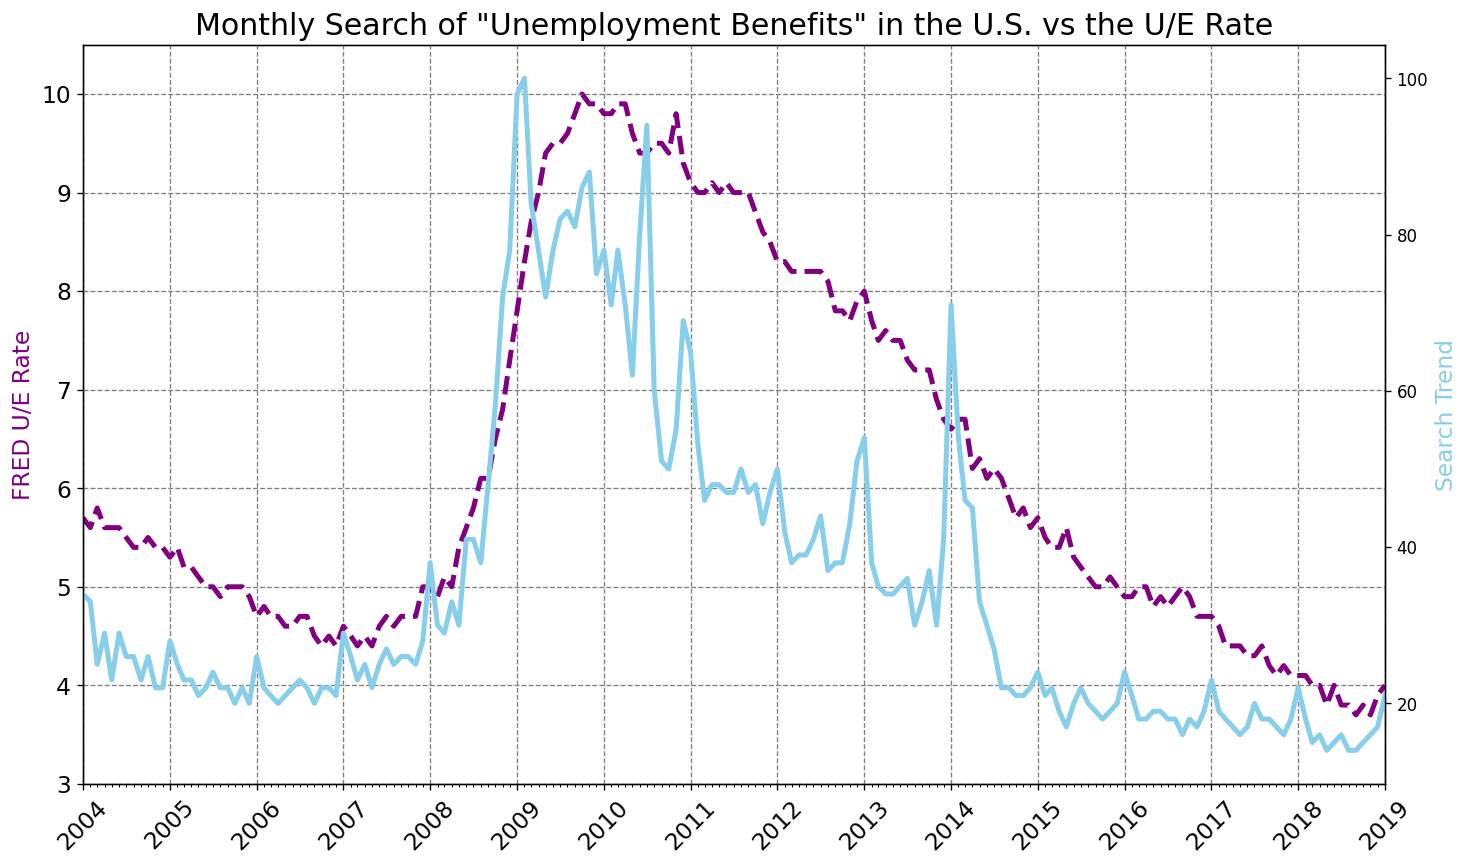

In [ ]:
# Create a figure and axes for the plot with a specified size and resolution
plt.figure(figsize=(14,8), dpi=120)
# Set the title of the plot
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
# Set the font size for the y and x axes labels
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# Get the current axes and create a twin axis for the second y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# Set the labels and colors for the y-axes
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

# Set the major and minor locators and formatters for the x-axis (dates)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set the limits for the y and x axes
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Show the grid lines as dark grey dashed lines
ax1.grid(color='grey', linestyle='--')

# Plot the unemployment rate and unemployment benefits search data on their respective axes
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE,
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH,
         color='skyblue', linewidth=3)

# Display the plot
plt.show()

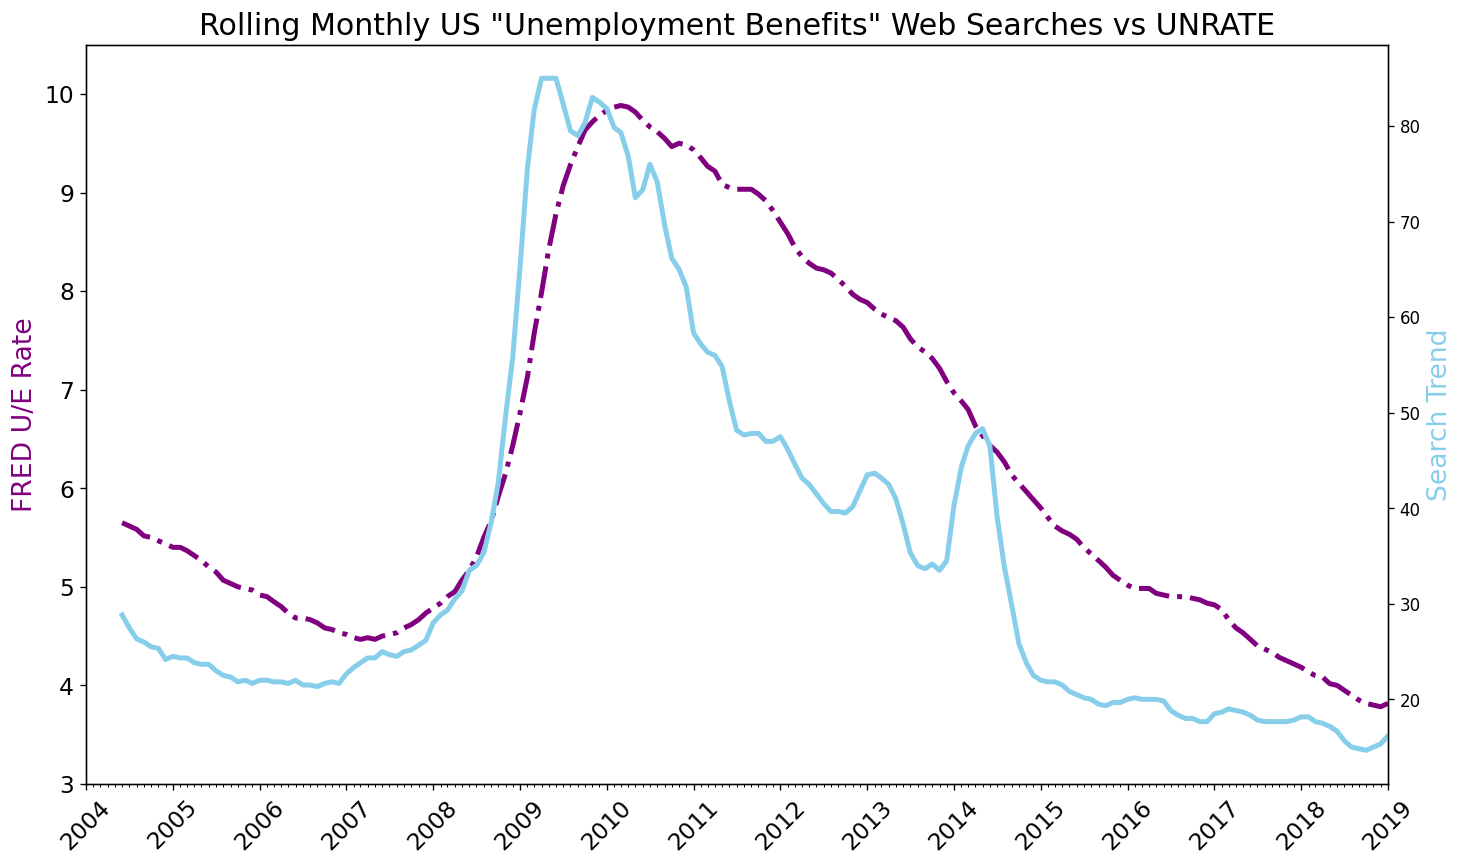

In [ ]:
# Create a figure and axes for the plot with a specified size and resolution
plt.figure(figsize=(14,8), dpi=120)
# Set the title of the plot
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
# Set the font size for the y and x axes labels
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# Get the current axes and create a twin axis for the second y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# Set the major and minor locators and formatters for the x-axis (dates)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set the labels and colors for the y-axes
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

# Set the limits for the y and x axes
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

# Calculate the rolling average over a 6-month window for both columns
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# Plot the rolling average of unemployment rate and unemployment benefits search data
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

# Display the plot
plt.show()

# Conclusion

Based on the data exploration and visualizations, we can observe the following relationships:

*   **Tesla Stock Price vs. Search Volume:** The plot shows a noticeable correlation between the search volume for Tesla and its stock price, particularly during periods of significant price changes. Increased search interest seems to precede or coincide with increases in the stock price.
*   **Bitcoin Price vs. Search Volume:** The Bitcoin price and search volume appear to be related, with spikes in search interest often coinciding with or following significant price movements. The rolling average plot helps to smooth out the daily fluctuations and highlights the overall trend.
*   **Unemployment Benefits Search vs. Unemployment Rate:** The plot of unemployment benefits search volume against the actual unemployment rate shows a strong relationship. The rolling average plot suggests that changes in search volume for "unemployment benefits" might slightly precede changes in the official unemployment rate, potentially indicating that increased search activity could be an early indicator of rising unemployment.

Overall, Google Trends data appears to be a valuable tool for exploring potential correlations with financial and economic data. While correlation does not equal causation, these visualizations suggest that search interest can reflect public attention and potentially provide insights into market and economic trends.